# Utterances Data Analyse

In [40]:
import numpy as np
import os
import pandas as pd
from numpy import array
from tensorflow.keras import backend
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Lambda
from keras.layers import Input
from keras.layers import concatenate
from keras.layers.embeddings import Embedding
from keras.layers import LSTM,Conv1D,MaxPooling1D
from keras.models import Model
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import keras
import seaborn as sns
import matplotlib.pyplot as plt
import re
import num2words
%matplotlib inline

In [6]:
local_path = r'/Users/pablouribepizarro/Desktop/CIAE/CIBL/Raw/inquiry_lessons'
files_path = []
# r=root, d=directories, f = files
for r, d, f in os.walk(local_path):
    for file in f:
        if '.xlsx' in file:
            files_path.append(os.path.join(r, file))
            
n_files = len(files_path)
print(n_files)

11


In [7]:
dfs = []
for path in files_path:
    df = pd.read_excel(path)
    df = df[np.isfinite(df['Phase'])]
    df['Phase'] = df['Phase'].astype(int)-1
    df['Utterance'] = df['Utterance'].apply(lambda row: re.sub(r"(\d+)", lambda x: num2words.num2words(int(x.group(0))), row))
    dfs.append(df)
docs_size = pd.Series([df.shape[0] for df in dfs])
dfs[0].head()

,StudentID,Student,time_start,time_end,Phase,Phase_start,Phase_end,Utterance
0,O2,NaN,NaN,NaN,0,1.0,NaN,Satunnaiskävely.
1,O1,NaN,NaN,NaN,0,NaN,NaN,[lukee tehtävänantoa]
2,O1,NaN,NaN,NaN,0,NaN,1.0,Voi voi. [käynnistää videon]
3,O1,NaN,NaN,NaN,0,1.0,NaN,"Missä se vaeltaa siellä? Onks se, ei. Ei, se e..."
4,O2,NaN,NaN,NaN,0,NaN,NaN,[epäselvä]


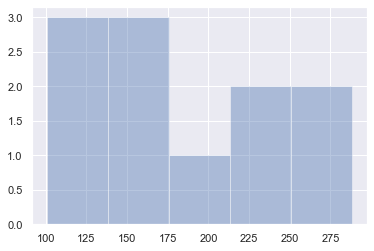

In [8]:
sns.set(); 
ax = sns.distplot(docs_size,kde=False,bins=5)

In [9]:
docs = [' '.join(list(df['Utterance'].astype(str))) for df in dfs]

In [10]:
t = Tokenizer(filters='¡!"\'#$%&()*+,./:;<=>?@[\\]^_`{|}~\t\n')
t.fit_on_texts(docs)

In [11]:
encoded_docs = [array(t.texts_to_sequences([d])[0]) for d in docs]
encoded_docs[0]
docs_size_words = pd.Series([len(doc) for doc in encoded_docs])

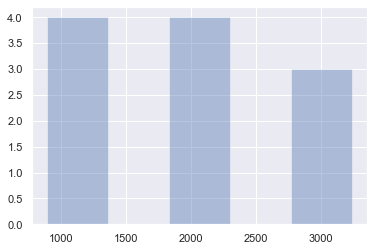

In [12]:
sns.set(); 
ax = sns.distplot(docs_size_words,kde=False,bins=5)

In [13]:
padded_docs = pad_sequences(encoded_docs, padding='post')
max_length = len(padded_docs[0])
print(max_length)

3238


In [14]:
common_words = [key for key in list(t.word_index)[0:30]]
common_words_count = [t.word_counts.get(word) for word in common_words]
common_words_df = pd.DataFrame()
common_words_df['Words'] = common_words
common_words_df['Count'] = common_words_count
common_words_df = common_words_df.sort_values('Count',ascending=False)

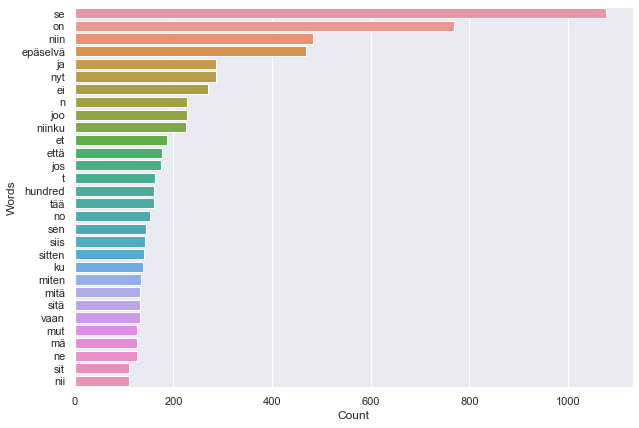

In [15]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.barplot(y="Words", x="Count", data=common_words_df)

In [16]:
list_of_words = ['movement','speed','acceleration','force','heat','temperature','entropy','enthalpy',
                 'power','energy','electricity','pressure',
                 'volume','chemical','potential',
                 'Carnot','Maxwell','Boltzmann','Gibbs',
                 'girl','man','woman','boy','sun',
                 'moon','work','motor','car','vehicle',
                'water','gas','light','machine','cycle','thermodynamics',
                'number','calculation','reaction','steam','problem','engine','statistical',
                'air','pump','law','system']
finnish_list = ['liike','nopeus','kiihtyvyys','voima','lämpö', 'lämpötila', 'entropia', 'entalpia',
                'teho', 'energia', 'sähkö', 'paine',
                'colyymi', 'kemialliset', 'mahdollinen',
                'carnot', 'maxwell', 'boltzmann', 'gibbs',
                'tyttö', 'mies', 'nainen', 'poika', 'aurinko',
                'kuu', 'työ','moottori','auto','ajoneuvo',
               'vesi','kaasu','valo','kone','sykli','termodynamiikka',
               'määrä','laskeminen','reaktio','höyry','ongelma','tilastollinen',
                'ilma','pumppu','laki','järjestelmä']
dictionary = dict(zip(finnish_list, list_of_words))

In [17]:
physics_words_count = [t.word_counts.get(word) for word in finnish_list]
physics_words_df = pd.DataFrame()
physics_words_df['Words'] = finnish_list
physics_words_df['Count'] = physics_words_count
physics_words_df = physics_words_df.sort_values('Count',ascending=False)

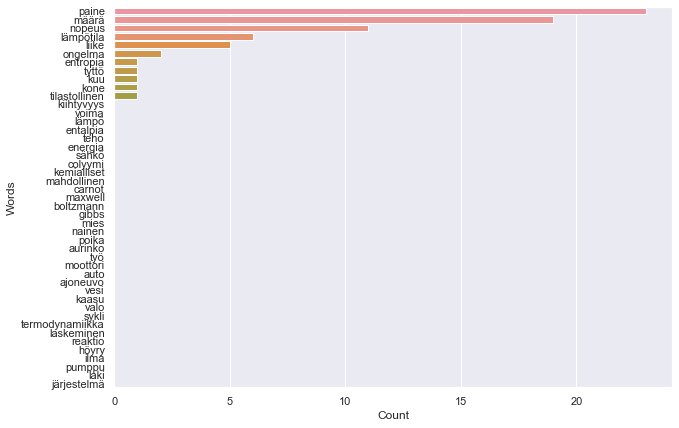

In [18]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.barplot(y="Words", x="Count", data=physics_words_df,)

In [19]:
t.word_index.get(list(t.word_index)[-1])

3500

In [20]:
padded_docs = pad_sequences(encoded_docs, padding='post')
max_length = len(padded_docs[0])
print(max_length)
vocab_size = 10000

3238


In [21]:
i = 0
max_length = 30
for df in dfs:
    print('Processing Document '+str(i))
    i+=1
    df['Relative Position'] = df.index/len(df)
    df['Number of Words'] = df.apply(lambda row: len(row['Utterance'].split()), axis = 1)
    df['Tokenized Utterance'] = df.apply(lambda row: t.texts_to_sequences([str(row['Utterance'])])[0], axis = 1)
    df['Previous Tokenized Utterance'] = df['Tokenized Utterance'].shift(1)
    df['Next Tokenized Utterance'] = df['Tokenized Utterance'].shift(-1)
    df = df.dropna()
print('Done!')

Processing Document 0
Processing Document 1
Processing Document 2
Processing Document 3
Processing Document 4
Processing Document 5
Processing Document 6
Processing Document 7
Processing Document 8
Processing Document 9
Processing Document 10
Done!


## Splitting Training and Test Set

In [24]:
max_length = 20
all_data = pd.concat(dfs).reset_index()[['Tokenized Utterance','Previous Tokenized Utterance','Next Tokenized Utterance' ,'Phase']].dropna()
X = np.concatenate((pad_sequences(all_data['Tokenized Utterance'],maxlen=max_length ,padding='post'),
     pad_sequences(all_data['Previous Tokenized Utterance'],maxlen=max_length ,padding='post'),
     pad_sequences(all_data['Next Tokenized Utterance'],maxlen=max_length ,padding='post')), axis=1)
y = keras.utils.to_categorical(all_data['Phase'], num_classes=5, dtype='float32')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#TO DO: mirar palabras del test set fuera del training set 

/Users/pablouribepizarro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


## 2.1 Trainable Embedding Layer - Simple NN 

In [43]:
#Mirar Callbacks, Dropout, Batch-Normalization
model = Sequential()
model.add(Embedding(vocab_size, output_dim=200,input_length=max_length*3))
#model.add(Flatten()) #Flatten ---> Sum
model.add(Lambda(lambda x: K.sum(x, axis=1))) #Sum
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.save_weights(r'/Users/pablouribepizarro/Desktop/CIAE/CIBL/model_weights/model.h5')



In [97]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 60, 200)           2000000   
_________________________________________________________________
lambda_10 (Lambda)           (None, 200)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                12864     
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 5)                 325       
Total params: 2,013,189
Trainable params: 2,013,189
Non-trainable params: 0
_________________________________________________________________


Train on 1566 samples, validate on 392 samples
Epoch 1/20
 - 4s - loss: 1.3769 - acc: 0.4464 - val_loss: 1.1085 - val_acc: 0.6097

Epoch 00001: val_acc improved from -inf to 0.60969, saving model to /Users/pablouribepizarro/Desktop/CIAE/CIBL/model_weights/model-001-0.446360-0.609694.h5
Epoch 2/20
 - 2s - loss: 0.9151 - acc: 0.6903 - val_loss: 0.9073 - val_acc: 0.7117

Epoch 00002: val_acc improved from 0.60969 to 0.71173, saving model to /Users/pablouribepizarro/Desktop/CIAE/CIBL/model_weights/model-002-0.690294-0.711735.h5
Epoch 3/20
 - 2s - loss: 0.6365 - acc: 0.8001 - val_loss: 0.7640 - val_acc: 0.7296

Epoch 00003: val_acc improved from 0.71173 to 0.72959, saving model to /Users/pablouribepizarro/Desktop/CIAE/CIBL/model_weights/model-003-0.800128-0.729592.h5
Epoch 4/20
 - 2s - loss: 0.4393 - acc: 0.8697 - val_loss: 0.7080 - val_acc: 0.7628

Epoch 00004: val_acc improved from 0.72959 to 0.76276, saving model to /Users/pablouribepizarro/Desktop/CIAE/CIBL/model_weights/model-004-0.869

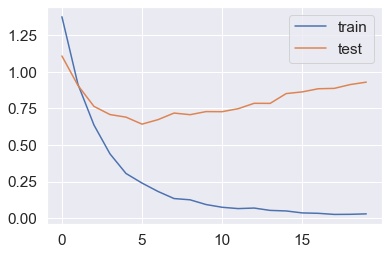

In [98]:
checkpoint = ModelCheckpoint('/Users/pablouribepizarro/Desktop/CIAE/CIBL/model_weights/model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', 
                             verbose=1, monitor='val_acc',save_best_only=True, mode='auto')

history = model.fit(X_train, y_train, epochs=20, batch_size=64, 
                      validation_data=(X_test, y_test), verbose=2, shuffle=True, callbacks=[checkpoint])
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [99]:
from numpy import argmax
y_pred = model.predict(X_test).argmax(axis=-1)
y_real = y_test.argmax(axis=-1)

In [157]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
results = confusion_matrix(y_real, y_pred)
accuracy_score(y_real, y_pred)

0.532967032967033

In [101]:
print(results)
print(classification_report(y_real, y_pred))

[[ 94   0   3   1  10]
 [  3  33   6   0   0]
 [  4   0  81   2  15]
 [  0   0   2   4   5]
 [  8   0  10   8 103]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       108
           1       1.00      0.79      0.88        42
           2       0.79      0.79      0.79       102
           3       0.27      0.36      0.31        11
           4       0.77      0.80      0.79       129

    accuracy                           0.80       392
   macro avg       0.74      0.72      0.73       392
weighted avg       0.81      0.80      0.81       392



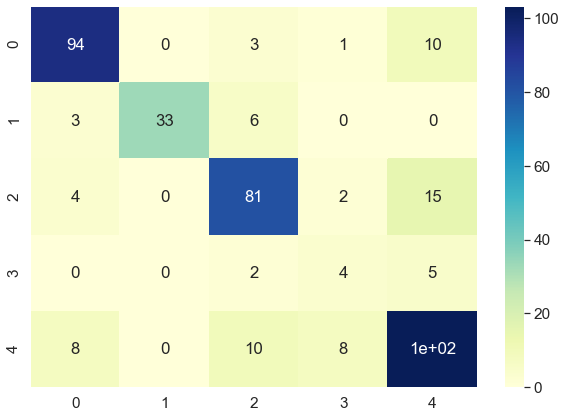

In [102]:
import seaborn as sns
df_cm = pd.DataFrame(results, index = range(5),
                  columns = range(5))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, cmap="YlGnBu")

## 2.2 Vector Representation of Learned Embeddings 

In [83]:
embeddings = model.layers[0].get_weights()[0]
#Tokenizer
words_embeddings = [embeddings[t.texts_to_sequences([word])[0][0]] for word in list(t.word_index.keys())]

In [84]:
#Proyection in 2 components


#embeddings_proyected = TSNE(n_components=2).fit_transform(words_embeddings)
embeddings_proyected = PCA().fit_transform(words_embeddings)

In [85]:
word_df = pd.DataFrame(embeddings_proyected)
word_df['Finnish'] = list(t.word_index.keys())

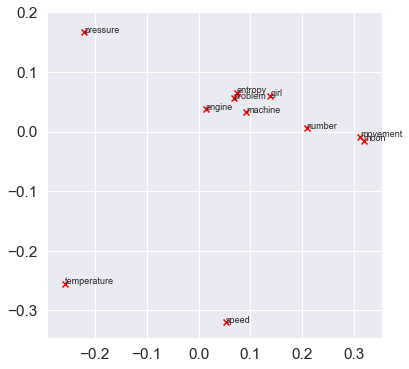

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6,6))
data = word_df.loc[word_df['Finnish'].isin(finnish_list)].reset_index()
#data = word_df.sample(50).reset_index()
types = [dictionary.get(name) for name in data['Finnish'].values]
#types = data['Finnish']
x_coords = data[0]
y_coords = data[1]

for i,type in enumerate(types):
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y, marker='x', color='red')
    plt.text(x, y, type, fontsize=9)
plt.show()

## 3.1 Trained Embeddings - Simple NN 

In [107]:
from gensim.models import KeyedVectors
path = r'/Users/pablouribepizarro/Desktop/CIAE/CIBL/finnish_4B_parsebank_skgram.bin'
wv = KeyedVectors.load_word2vec_format(path,binary=True, encoding='UTF-8',limit=500000,unicode_errors='replace')

/Users/pablouribepizarro/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [108]:
len(wv.get_vector('siis'))

200

In [109]:
max_vocab = 10000
embedding_matrix = np.zeros((max_vocab, 200))
for word, i in t.word_index.items():
    try:
        embedding_vector = wv.get_vector(word)
        embedding_matrix[i] = embedding_vector
    except:
        pass        

In [93]:
model_2 = Sequential()
model_2.add(Embedding(max_vocab,weights=[embedding_matrix],trainable=False,input_length=max_length*3,output_dim=200))
#model_2.add(Flatten()) #Flatten
model_2.add(Lambda(lambda x: K.sum(x, axis=1))) #Sum
model_2.add(Dense(64,activation='relu'))
model_2.add(Dropout(0.3))
model_2.add(Dense(5, activation='softmax'))

model_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model_2.save_weights(r'/Users/pablouribepizarro/Desktop/CIAE/CIBL/model_weights/model_2.h5')

In [94]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 60, 200)           2000000   
_________________________________________________________________
lambda_9 (Lambda)            (None, 200)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                12864     
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 5)                 325       
Total params: 2,013,189
Trainable params: 13,189
Non-trainable params: 2,000,000
_________________________________________________________________


Train on 1566 samples, validate on 392 samples
Epoch 1/70
 - 2s - loss: 2.1991 - acc: 0.3436 - val_loss: 1.4734 - val_acc: 0.4617

Epoch 00001: val_acc improved from -inf to 0.46173, saving model to /Users/pablouribepizarro/Desktop/CIAE/CIBL/model_weights/model_2-001-0.343550-0.461735.h5
Epoch 2/70
 - 0s - loss: 1.3940 - acc: 0.4476 - val_loss: 1.3041 - val_acc: 0.4949

Epoch 00002: val_acc improved from 0.46173 to 0.49490, saving model to /Users/pablouribepizarro/Desktop/CIAE/CIBL/model_weights/model_2-002-0.447637-0.494898.h5
Epoch 3/70
 - 0s - loss: 1.2873 - acc: 0.4853 - val_loss: 1.2573 - val_acc: 0.5128

Epoch 00003: val_acc improved from 0.49490 to 0.51276, saving model to /Users/pablouribepizarro/Desktop/CIAE/CIBL/model_weights/model_2-003-0.485313-0.512755.h5
Epoch 4/70
 - 0s - loss: 1.2430 - acc: 0.5006 - val_loss: 1.2358 - val_acc: 0.5255

Epoch 00004: val_acc improved from 0.51276 to 0.52551, saving model to /Users/pablouribepizarro/Desktop/CIAE/CIBL/model_weights/model_2-0


Epoch 00047: val_acc did not improve from 0.69898
Epoch 48/70
 - 0s - loss: 0.5364 - acc: 0.8040 - val_loss: 0.9067 - val_acc: 0.6862

Epoch 00048: val_acc did not improve from 0.69898
Epoch 49/70
 - 0s - loss: 0.5016 - acc: 0.8142 - val_loss: 0.9159 - val_acc: 0.6786

Epoch 00049: val_acc did not improve from 0.69898
Epoch 50/70
 - 0s - loss: 0.5024 - acc: 0.8123 - val_loss: 0.9144 - val_acc: 0.6913

Epoch 00050: val_acc did not improve from 0.69898
Epoch 51/70
 - 0s - loss: 0.4931 - acc: 0.8206 - val_loss: 0.9069 - val_acc: 0.7143

Epoch 00051: val_acc improved from 0.69898 to 0.71429, saving model to /Users/pablouribepizarro/Desktop/CIAE/CIBL/model_weights/model_2-051-0.820562-0.714286.h5
Epoch 52/70
 - 0s - loss: 0.5188 - acc: 0.8033 - val_loss: 0.8972 - val_acc: 0.6786

Epoch 00052: val_acc did not improve from 0.71429
Epoch 53/70
 - 0s - loss: 0.5063 - acc: 0.8110 - val_loss: 0.8987 - val_acc: 0.6888

Epoch 00053: val_acc did not improve from 0.71429
Epoch 54/70
 - 0s - loss: 0.

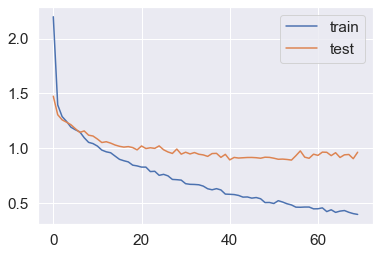

In [95]:
checkpoint2 = ModelCheckpoint('/Users/pablouribepizarro/Desktop/CIAE/CIBL/model_weights/model_2-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', 
                             verbose=1, monitor='val_acc',save_best_only=True, mode='auto')

history = model_2.fit(X_train, y_train, epochs=70, batch_size=64, 
                      validation_data=(X_test, y_test), verbose=2, shuffle=True, callbacks = [checkpoint2])
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [103]:
y_pred_2 = model_2.predict(X_test).argmax(axis=-1)
results = confusion_matrix(y_real, y_pred_2)
accuracy_score(y_real, y_pred_2)

0.6989795918367347

In [104]:
print(results)
print(classification_report(y_real, y_pred))
#AUC

[[77  2  5  0 24]
 [ 9 20  6  0  7]
 [ 2  0 79  0 21]
 [ 1  0  1  4  5]
 [15  0 16  4 94]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       108
           1       1.00      0.79      0.88        42
           2       0.79      0.79      0.79       102
           3       0.27      0.36      0.31        11
           4       0.77      0.80      0.79       129

    accuracy                           0.80       392
   macro avg       0.74      0.72      0.73       392
weighted avg       0.81      0.80      0.81       392



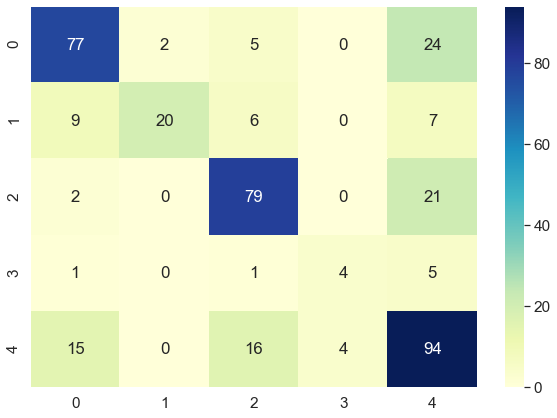

In [105]:
import seaborn as sns
df_cm = pd.DataFrame(results, index = range(5),
                  columns = range(5))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, cmap="YlGnBu")

## 3.2 Trained Embeddings - LSTM 

In [118]:
model_3 = Sequential()
model_3.add(Embedding(max_vocab,weights=[embedding_matrix],trainable=False,input_length=max_length*3,output_dim=200))
model_3.add(LSTM(128, return_sequences=True,
               input_shape=(200, max_length),recurrent_dropout = 0.1))
model_3.add(Dropout(0.3))
model_3.add(LSTM(128, return_sequences=True,
               input_shape=(200, max_length),recurrent_dropout = 0.1))
model_3.add(Dropout(0.3))
model_3.add(LSTM(128))
model_3.add(Dropout(0.3))
model_3.add(Dense(5, activation='softmax'))

model_3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [119]:
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 60, 200)           2000000   
_________________________________________________________________
lstm_4 (LSTM)                (None, 60, 128)           168448    
_________________________________________________________________
dropout_14 (Dropout)         (None, 60, 128)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 128)           131584    
_________________________________________________________________
dropout_15 (Dropout)         (None, 60, 128)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
__________

Train on 1566 samples, validate on 392 samples
Epoch 1/30
 - 30s - loss: 1.4814 - acc: 0.3531 - val_loss: 1.3803 - val_acc: 0.3801
Epoch 2/30
 - 22s - loss: 1.3699 - acc: 0.4004 - val_loss: 1.3056 - val_acc: 0.4617
Epoch 3/30
 - 24s - loss: 1.3028 - acc: 0.4432 - val_loss: 1.3227 - val_acc: 0.4337
Epoch 4/30
 - 23s - loss: 1.2935 - acc: 0.4559 - val_loss: 1.2666 - val_acc: 0.4413
Epoch 5/30
 - 24s - loss: 1.2707 - acc: 0.4515 - val_loss: 1.2407 - val_acc: 0.4617
Epoch 6/30
 - 24s - loss: 1.2287 - acc: 0.4847 - val_loss: 1.2515 - val_acc: 0.4439
Epoch 7/30
 - 21s - loss: 1.2447 - acc: 0.4732 - val_loss: 1.2573 - val_acc: 0.4592
Epoch 8/30
 - 22s - loss: 1.1831 - acc: 0.5121 - val_loss: 1.2074 - val_acc: 0.4796
Epoch 9/30
 - 24s - loss: 1.1567 - acc: 0.5338 - val_loss: 1.1898 - val_acc: 0.4949
Epoch 10/30
 - 22s - loss: 1.0844 - acc: 0.5792 - val_loss: 1.2224 - val_acc: 0.5179
Epoch 11/30
 - 23s - loss: 1.0785 - acc: 0.5881 - val_loss: 1.1705 - val_acc: 0.5306
Epoch 12/30
 - 24s - loss: 

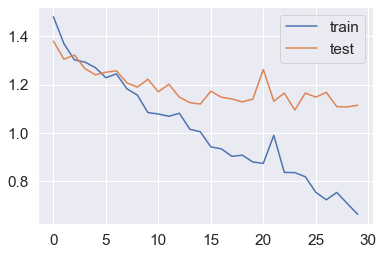

In [120]:
history = model_3.fit(X_train, y_train, epochs=30, batch_size=128, 
                      validation_data=(X_test, y_test), verbose=2, shuffle=True)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [121]:
y_pred_3 = model_3.predict(X_test).argmax(axis=-1)
results = confusion_matrix(y_real, y_pred_3)
accuracy_score(y_real, y_pred_3)

0.5816326530612245

In [ ]:
import seaborn as sns
df_cm = pd.DataFrame(results, index = range(5),
                  columns = range(5))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, cmap="YlGnBu")

## 3.3 Trained Embeddings - CNN

In [106]:
model_4 = Sequential()
model_4.add(Embedding(max_vocab,weights=[embedding_matrix],trainable=False,input_length=max_length*3,output_dim=200))
model_4.add(Conv1D(128, 10, activation='relu'))
model_4.add(MaxPooling1D(5))
model_4.add(Dropout(0.5))
model_4.add(Flatten())
model_4.add(Dense(128, activation='relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(5, activation='softmax'))

model_4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

W1008 00:29:02.507683 140736196957056 deprecation_wrapper.py:119] From /Users/pablouribepizarro/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



Train on 1566 samples, validate on 392 samples
Epoch 1/40
 - 5s - loss: 1.4441 - acc: 0.3665 - val_loss: 1.3328 - val_acc: 0.4260
Epoch 2/40
 - 3s - loss: 1.2845 - acc: 0.4604 - val_loss: 1.3172 - val_acc: 0.4413
Epoch 3/40
 - 3s - loss: 1.1837 - acc: 0.5383 - val_loss: 1.2391 - val_acc: 0.5102
Epoch 4/40
 - 3s - loss: 1.0635 - acc: 0.5817 - val_loss: 1.1609 - val_acc: 0.5383
Epoch 5/40
 - 3s - loss: 0.9028 - acc: 0.6590 - val_loss: 1.1115 - val_acc: 0.5485
Epoch 6/40
 - 3s - loss: 0.7386 - acc: 0.7248 - val_loss: 1.0254 - val_acc: 0.5944
Epoch 7/40
 - 3s - loss: 0.5898 - acc: 0.7950 - val_loss: 0.9976 - val_acc: 0.6148
Epoch 8/40
 - 3s - loss: 0.4649 - acc: 0.8359 - val_loss: 0.9718 - val_acc: 0.6148
Epoch 9/40
 - 3s - loss: 0.3557 - acc: 0.8838 - val_loss: 0.9684 - val_acc: 0.6556
Epoch 10/40
 - 3s - loss: 0.2920 - acc: 0.9106 - val_loss: 0.9776 - val_acc: 0.6531
Epoch 11/40
 - 3s - loss: 0.2274 - acc: 0.9291 - val_loss: 0.9481 - val_acc: 0.6760
Epoch 12/40
 - 3s - loss: 0.1597 - acc

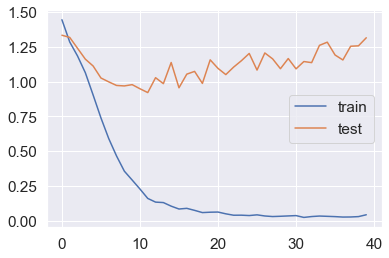

In [107]:
history = model_4.fit(X_train, y_train, epochs=40, batch_size=64, 
                      validation_data=(X_test, y_test), verbose=2, shuffle=True)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [108]:
y_pred_4 = model_4.predict(X_test).argmax(axis=-1)
results = confusion_matrix(y_real, y_pred_4)
accuracy_score(y_real, y_pred_4)

0.6913265306122449

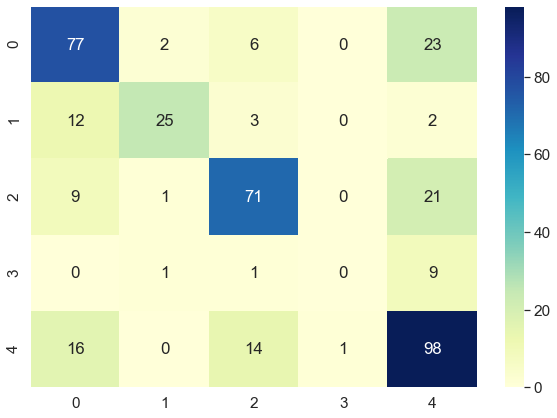

In [109]:
import seaborn as sns
df_cm = pd.DataFrame(results, index = range(5),
                  columns = range(5))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, cmap="YlGnBu")

## 3.4 Vector Representation of Pre-Trainned Embeddings 

In [110]:
embeddings = model_2.layers[0].get_weights()[0]
#Tokenizer
words_embeddings = [embeddings[t.texts_to_sequences([word])[0][0]] for word in list(t.word_index.keys())]

In [111]:
#Proyection in 2 components


#embeddings_proyected = TSNE(n_components=2).fit_transform(words_embeddings)
embeddings_proyected = PCA().fit_transform(words_embeddings)

In [112]:
word_df = pd.DataFrame(embeddings_proyected)
word_df['Finnish'] = list(t.word_index.keys())

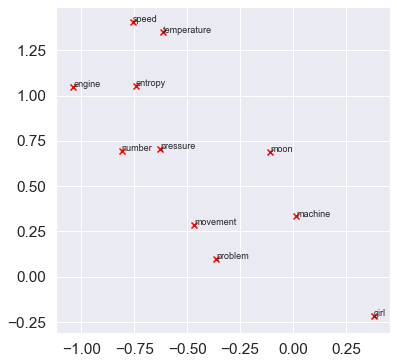

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6,6))
data = word_df.loc[word_df['Finnish'].isin(finnish_list)].reset_index()
#data = word_df.sample(50).reset_index()
types = [dictionary.get(name) for name in data['Finnish'].values]
#types = data['Finnish']
x_coords = data[0]
y_coords = data[1]

for i,type in enumerate(types):
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y, marker='x', color='red')
    plt.text(x, y, type, fontsize=9)
plt.show()

## Document Splitting and Model Training

In [53]:
from itertools import combinations

documents_numbers = range(11)
couples = list(map(set, combinations(documents_numbers, 2)))
max_length = 20
dic_acc_1 = {}

for couple in couples:
    #Split Training and Test Set
    training_dfs = [dfs[i] for i in (set(documents_numbers)-couple)]
    all_data_train = pd.concat(training_dfs).reset_index()[['Tokenized Utterance','Previous Tokenized Utterance','Next Tokenized Utterance' ,'Phase']].dropna()
    X_train = np.concatenate((pad_sequences(all_data_train['Tokenized Utterance'],maxlen=max_length ,padding='post'),
         pad_sequences(all_data_train['Previous Tokenized Utterance'],maxlen=max_length ,padding='post'),
         pad_sequences(all_data_train['Next Tokenized Utterance'],maxlen=max_length ,padding='post')), axis=1)
    y_train = keras.utils.to_categorical(all_data_train['Phase'], num_classes=5, dtype='float32')
    
    test_dfs = [dfs[i] for i in couple]
    all_data_test = pd.concat(test_dfs).reset_index()[['Tokenized Utterance','Previous Tokenized Utterance','Next Tokenized Utterance' ,'Phase']].dropna()
    X_test = np.concatenate((pad_sequences(all_data_test['Tokenized Utterance'],maxlen=max_length ,padding='post'),
         pad_sequences(all_data_test['Previous Tokenized Utterance'],maxlen=max_length ,padding='post'),
         pad_sequences(all_data_test['Next Tokenized Utterance'],maxlen=max_length ,padding='post')), axis=1)
    y_test = keras.utils.to_categorical(all_data_test['Phase'], num_classes=5, dtype='float32')
    
    #Load initial random weights
    model.load_weights(r'/Users/pablouribepizarro/Desktop/CIAE/CIBL/model_weights/model.h5')
    
    #Train and Save Best Model
    checkpoint_iter_1 = ModelCheckpoint('/Users/pablouribepizarro/Desktop/CIAE/CIBL/model_weights/model_'+str(list(couple)[0])+str(list(couple)[1])+'.h5', 
                             verbose=False, monitor='val_acc',save_best_only=True, mode='auto')

    history = model.fit(X_train, y_train, epochs=30, batch_size=64, 
                      validation_data=(X_test, y_test), verbose=False, shuffle=True, callbacks=[checkpoint_iter_1])
    
    model.load_weights(r'/Users/pablouribepizarro/Desktop/CIAE/CIBL/model_weights/model_'+str(list(couple)[0])+'_'+str(list(couple)[1])+'.h5')
    #Save Accuracy Score
    y_real = y_test.argmax(axis=-1)
    y_pred = model.predict(X_test).argmax(axis=-1)
    print(str(list(couple)[0])+str(list(couple)[1])+' :'+str(accuracy_score(y_real, y_pred)))
    dic_acc_1[str(couple)] = accuracy_score(y_real, y_pred)

/Users/pablouribepizarro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


01 :0.5494505494505495
02 :0.5517928286852589


/Users/pablouribepizarro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



03 :0.49430523917995445
04 :0.4977168949771689
05 :0.5079681274900398
06 :0.5357142857142857
07 :0.5047169811320755
08 :0.519916142557652
09 :0.5194805194805194
010 :0.5162907268170426
12 :0.569327731092437
13 :0.5326876513317191
14 :0.5606796116504854
15 :0.5294117647058824
16 :0.6370558375634517
17 :0.5527638190954773
81 :0.5720620842572062
19 :0.5766016713091922
110 :0.6085790884718498
23 :0.5555555555555556
24 :0.5733695652173914
25 :0.5439814814814815
26 :0.6285714285714286
27 :0.5677966101694916
82 :0.5749385749385749
92 :0.580952380952381
210 :0.5927051671732523
34 :0.5409836065573771
35 :0.4878048780487805
36 :0.5679442508710801
37 :0.5051546391752577
83 :0.5319767441860465
93 :0.5198412698412699
103 :0.48872180451127817
45 :0.5163043478260869
46 :0.6433566433566433
47 :0.5551724137931034
84 :0.577259475218659
94 :0.5856573705179283
104 :0.5811320754716981
56 :0.5828571428571429
57 :0.5084745762711864
85 :0.5036855036855037
95 :0.49206349206349204
105 :0.5319148936170213
67 :0.

In [47]:
dic_acc_2 = {}
for couple in couples:
    #Split Training and Test Set
    training_dfs = [dfs[i] for i in (set(documents_numbers)-couple)]
    all_data_train = pd.concat(training_dfs).reset_index()[['Tokenized Utterance','Previous Tokenized Utterance','Next Tokenized Utterance' ,'Phase']].dropna()
    X_train = np.concatenate((pad_sequences(all_data_train['Tokenized Utterance'],maxlen=max_length ,padding='post'),
         pad_sequences(all_data_train['Previous Tokenized Utterance'],maxlen=max_length ,padding='post'),
         pad_sequences(all_data_train['Next Tokenized Utterance'],maxlen=max_length ,padding='post')), axis=1)
    y_train = keras.utils.to_categorical(all_data_train['Phase'], num_classes=5, dtype='float32')
    
    test_dfs = [dfs[i] for i in couple]
    all_data_test = pd.concat(test_dfs).reset_index()[['Tokenized Utterance','Previous Tokenized Utterance','Next Tokenized Utterance' ,'Phase']].dropna()
    X_test = np.concatenate((pad_sequences(all_data_test['Tokenized Utterance'],maxlen=max_length ,padding='post'),
         pad_sequences(all_data_test['Previous Tokenized Utterance'],maxlen=max_length ,padding='post'),
         pad_sequences(all_data_test['Next Tokenized Utterance'],maxlen=max_length ,padding='post')), axis=1)
    y_test = keras.utils.to_categorical(all_data_test['Phase'], num_classes=5, dtype='float32')
    
    #Load initial random weights
    model_2.load_weights(r'/Users/pablouribepizarro/Desktop/CIAE/CIBL/model_weights/model_2.h5')
    
    #Train and Save Best Model
    checkpoint_iter_2 = ModelCheckpoint('/Users/pablouribepizarro/Desktop/CIAE/CIBL/model_weights/model_2_'+str(list(couple)[0])+str(list(couple)[1])+'.h5', 
                             verbose=False, monitor='val_acc',save_best_only=True, mode='auto')

    history = model_2.fit(X_train, y_train, epochs=40, batch_size=64, 
                      validation_data=(X_test, y_test), verbose=False, shuffle=True, callbacks=[checkpoint_iter_2])
    
    model_2.load_weights(r'/Users/pablouribepizarro/Desktop/CIAE/CIBL/model_weights/model_2_'+str(list(couple)[0])+str(list(couple)[1])+'.h5')
    #Save Accuracy Score
    y_real = y_test.argmax(axis=-1)
    y_pred = model_2.predict(X_test).argmax(axis=-1)
    print(str(list(couple)[0])+str(list(couple)[1])+' :'+str(accuracy_score(y_real, y_pred)))
    dic_acc_2[str(couple)] = accuracy_score(y_real, y_pred)
    
    
    

/Users/pablouribepizarro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


01 :0.5146520146520146
02 :0.5079681274900398


/Users/pablouribepizarro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


03 :0.4715261958997722
04 :0.5114155251141552
05 :0.4900398406374502
06 :0.5380952380952381
07 :0.47641509433962265
08 :0.480083857442348
09 :0.5012987012987012
010 :0.5112781954887218
12 :0.5357142857142857
13 :0.5230024213075061
14 :0.5339805825242718
15 :0.4894957983193277
16 :0.5812182741116751
17 :0.5251256281407035
81 :0.49002217294900224
19 :0.5431754874651811
110 :0.5576407506702413
23 :0.5176151761517616
24 :0.5244565217391305
25 :0.5162037037037037
26 :0.5828571428571429
27 :0.5508474576271186
82 :0.5307125307125307
92 :0.546031746031746
210 :0.5592705167173252
34 :0.5245901639344263
35 :0.4742547425474255
36 :0.5435540069686411
37 :0.4536082474226804
83 :0.48255813953488375
93 :0.49603174603174605
103 :0.48872180451127817
45 :0.5
46 :0.5874125874125874
47 :0.5206896551724138
84 :0.5276967930029155
94 :0.5577689243027888
104 :0.5509433962264151
56 :0.5171428571428571
57 :0.5
85 :0.48157248157248156
95 :0.5111111111111111
105 :0.49240121580547114
67 :0.5698529411764706
86 :0.5

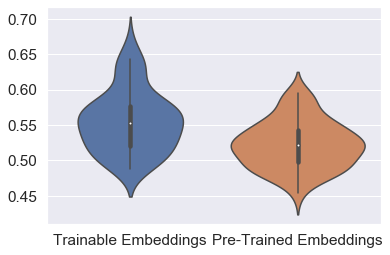

In [54]:
acc = pd.DataFrame()
acc['Trainable Embeddings'] = list(dic_acc_1.values())
acc['Pre-Trained Embeddings'] = list(dic_acc_2.values())
ax = sns.violinplot(data=acc)

In [116]:
acc['Trainable Embeddings'].std()

0.04325777892784417

In [117]:
acc['Pre-Trained Embeddings'].std()

0.033253789995277366

In [122]:
f1 = open(r"/Users/pablouribepizarro/Desktop/CIAE/CIBL/Results/dict_acc_1.txt","w")
f1.write( str(dic_acc_1) )
f1.close()
f2 = open(r"/Users/pablouribepizarro/Desktop/CIAE/CIBL/Results/dict_acc_2.txt","w")
f2.write( str(dic_acc_2) )
f2.close()